In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"georgeedward","key":"afead40b9dc6c7b6362b651cbc0622be"}'}

In [3]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-24 09:20:05           9678  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5923  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2195  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2472  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [8]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.8MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 49.2MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.21MB/s]


In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [10]:
titanic = pd.read_csv('train.csv')
titanic.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff99c933090>,
      dtype=object)

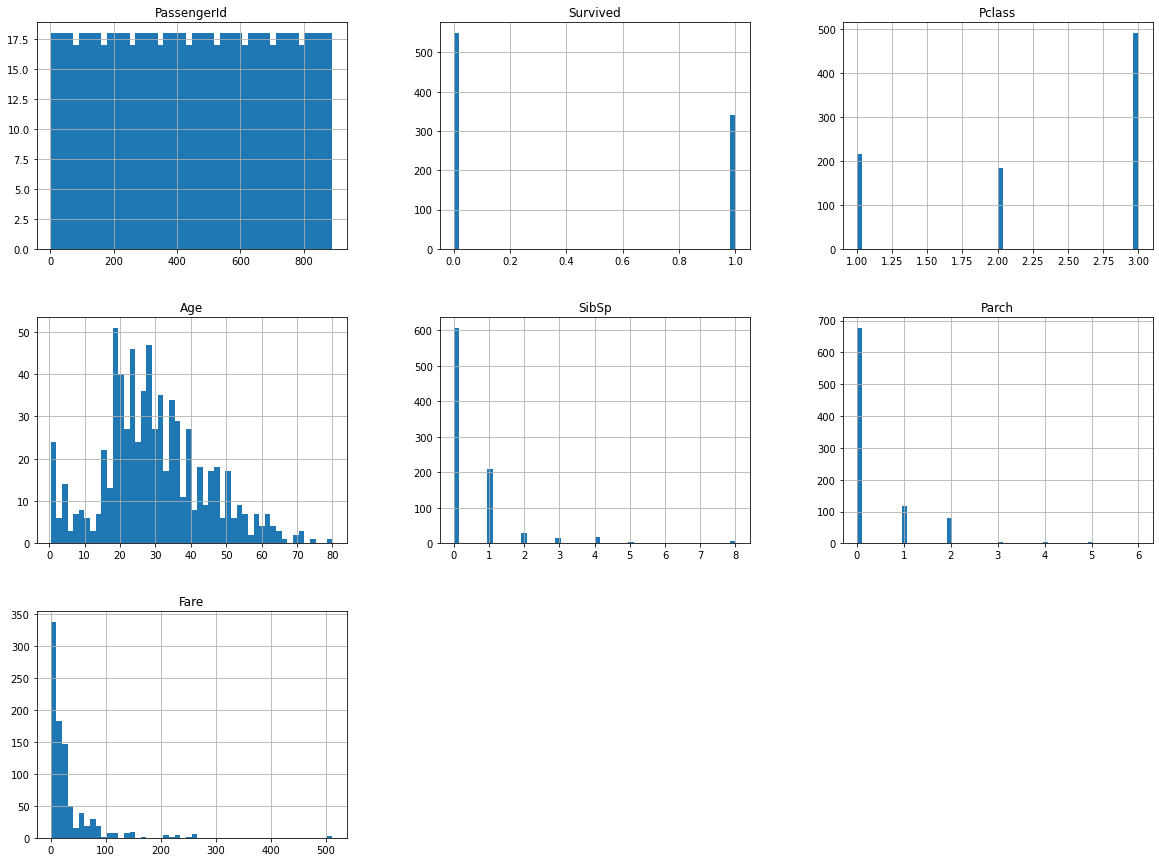

In [20]:
titanic.hist(bins=50, figsize=(20, 15))

In [21]:
corr_matrix = titanic.corr()

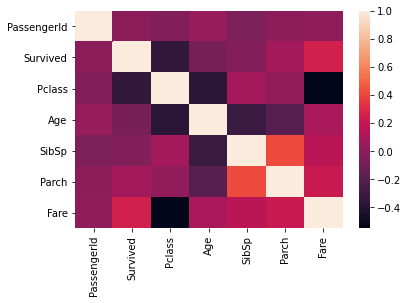

In [23]:
sns.heatmap(corr_matrix)

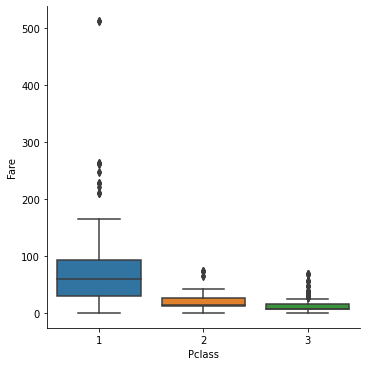

In [29]:
sns.catplot(x='Pclass', y='Fare', data=titanic, kind='box')

In [30]:
titanic[titanic['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [33]:
titanic.drop(titanic[titanic['Fare'] > 500].index, inplace=True)

In [35]:
titanic[titanic['Fare'] > 500].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

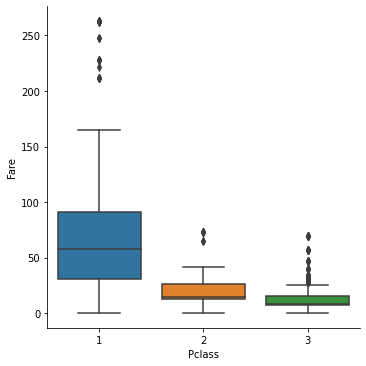

In [36]:
sns.catplot(x='Pclass', y='Fare', data=titanic, kind='box')

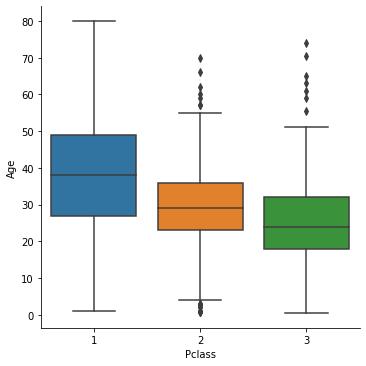

In [37]:
sns.catplot(x='Pclass', y='Age', data=titanic, kind='box')

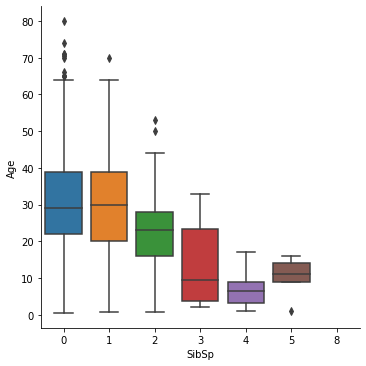

In [43]:
sns.catplot(x='SibSp', y='Age', data=titanic, kind='box')

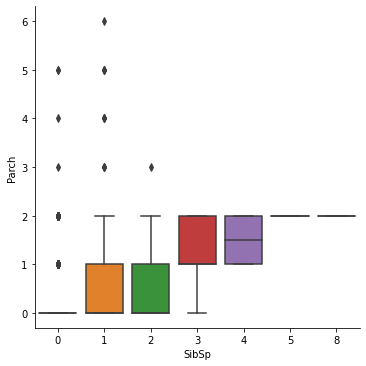

In [44]:
sns.catplot(x='SibSp', y='Parch', data=titanic, kind='box')

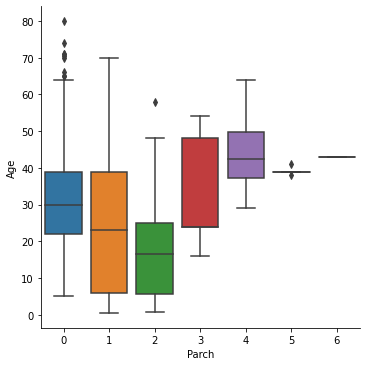

In [45]:
sns.catplot(x='Parch', y='Age', data=titanic, kind='box')

In [46]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [48]:
titanic['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 888, dtype: float64

In [49]:
titanic['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 888, dtype: int64

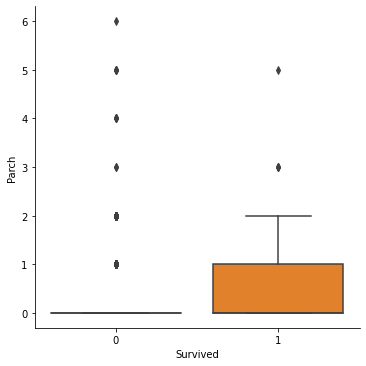

In [51]:
sns.catplot(x='Survived', y='Parch', data=titanic, kind='box')

In [52]:
corr_matrix['Age'].sort_values()

Pclass        -0.369226
SibSp         -0.308247
Parch         -0.189119
Survived      -0.077221
PassengerId    0.036847
Fare           0.096067
Age            1.000000
Name: Age, dtype: float64

In [54]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [60]:
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [62]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24', 'C90', 

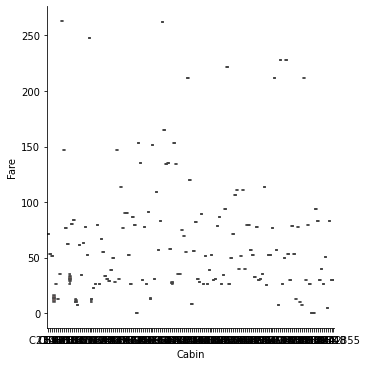

In [66]:
sns.catplot(x='Cabin', y='Fare', data=titanic, kind='box')

In [63]:
titanic[titanic['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [67]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [80]:
titanic['Embarked'].isnull().unique()

array([False,  True])

In [112]:
titanic[titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [168]:
def fill_age(df):
  df['Age'].fillna(df['Age'].median(), inplace=True)
  return df

def fill_embarked(df):
  df['Embarked'].fillna('S', inplace=True)
  return df

def extract_title(df):
  df['Title'] = df['Name'].apply(lambda s: s.split(' ')[1][:-1])
  return df

def extract_family(df):
  family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
  df['Family'] = df.apply(lambda row: row['Parch'] + row['SibSp'] + 1, axis=1)
  df['Family_Group'] = df['Family'].map(family_map)
  return df

def extract_total_cost(df):
  df['Total'] = df.apply(lambda row: row['Fare'] * (row['Family'] + 1), axis=1)
  return df

def extract_cabin_letter(df):
  df['Cabin'].fillna('Z', inplace=True)
  df['LetterCabin'] = df['Cabin'].apply(lambda s: s[0])
  return df

def extract_fare_qcut(df):
  df['Fare_qcut'] = pd.qcut(df['Fare'], 13)
  return df

def transform(df):
  df = fill_age(df)
  df = fill_embarked(df)
  df = extract_title(df)
  df = extract_family(df)
  df = extract_total_cost(df)
  df = extract_cabin_letter(df)
  df = extract_fare_qcut(df)

  return df

In [169]:
titanic_prepared = transform(titanic)
titanic_prepared

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Total,Family,LetterCabin,Family_Group,Fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,Mr,21.7500,2,Z,Small,"(7.229, 7.75]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,213.8499,2,C,Small,"(55.0, 82.171]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Miss,15.8500,1,Z,Alone,"(7.896, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,159.3000,2,C,Small,"(33.0, 55.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S,Mr,16.1000,1,Z,Alone,"(7.896, 8.05]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Z,S,Rev,26.0000,1,Z,Alone,"(10.5, 13.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,60.0000,1,B,Alone,"(26.55, 33.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Z,S,Miss,117.2500,4,Z,Small,"(15.812, 23.45]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,60.0000,1,C,Alone,"(26.55, 33.0]"


In [170]:
titanic_prepared[titanic_prepared['Fare'] != titanic_prepared['Total']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Total,Family,LetterCabin,Family_Group,Fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,Mr,21.7500,2,Z,Small,"(7.229, 7.75]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,213.8499,2,C,Small,"(55.0, 82.171]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Miss,15.8500,1,Z,Alone,"(7.896, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,159.3000,2,C,Small,"(33.0, 55.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S,Mr,16.1000,1,Z,Alone,"(7.896, 8.05]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Z,S,Rev,26.0000,1,Z,Alone,"(10.5, 13.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,60.0000,1,B,Alone,"(26.55, 33.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Z,S,Miss,117.2500,4,Z,Small,"(15.812, 23.45]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,60.0000,1,C,Alone,"(26.55, 33.0]"


In [171]:
corr_matrix_prepared = titanic_prepared.corr()
corr_matrix_prepared['Survived'].sort_values()

Pclass        -0.334068
Age           -0.067081
SibSp         -0.033395
PassengerId   -0.006916
Family         0.018211
Parch          0.082157
Total          0.150657
Fare           0.261742
Survived       1.000000
Name: Survived, dtype: float64

In [172]:
def clean_features(df):
  df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Family'], axis=1).reset_index(drop=True)
  if 'Survived' in df:
    df = df.drop(['Survived'], axis=1).reset_index(drop=True)
  return df
titanic_ready = clean_features(titanic_prepared)
titanic_ready

,Pclass,Sex,Age,Embarked,Title,Total,LetterCabin,Family_Group,Fare_qcut
0,3,male,22.0,S,Mr,21.7500,Z,Small,"(7.229, 7.75]"
1,1,female,38.0,C,Mrs,213.8499,C,Small,"(55.0, 82.171]"
2,3,female,26.0,S,Miss,15.8500,Z,Alone,"(7.896, 8.05]"
3,1,female,35.0,S,Mrs,159.3000,C,Small,"(33.0, 55.0]"
4,3,male,35.0,S,Mr,16.1000,Z,Alone,"(7.896, 8.05]"
...,...,...,...,...,...,...,...,...,...
883,2,male,27.0,S,Rev,26.0000,Z,Alone,"(10.5, 13.0]"
884,1,female,19.0,S,Miss,60.0000,B,Alone,"(26.55, 33.0]"
885,3,female,28.0,S,Miss,117.2500,Z,Small,"(15.812, 23.45]"
886,1,male,26.0,C,Mr,60.0000,C,Alone,"(26.55, 33.0]"


In [173]:
titanic_ready[titanic_ready['LetterCabin'] != 'Z']

,Pclass,Sex,Age,Embarked,Title,Total,LetterCabin,Family_Group,Fare_qcut
1,1,female,38.0,C,Mrs,213.8499,C,Small,"(55.0, 82.171]"
3,1,female,35.0,S,Mrs,159.3000,C,Small,"(33.0, 55.0]"
6,1,male,54.0,S,Mr,103.7250,E,Alone,"(33.0, 55.0]"
10,3,female,4.0,S,Miss,66.8000,G,Small,"(15.812, 23.45]"
11,1,female,58.0,S,Miss,53.1000,C,Alone,"(23.45, 26.55]"
...,...,...,...,...,...,...,...,...,...
868,1,female,47.0,S,Mrs,210.2168,D,Small,"(33.0, 55.0]"
869,1,male,33.0,S,Mr,10.0000,B,Alone,"(-0.001, 7.229]"
876,1,female,56.0,C,Mrs,249.4749,C,Small,"(82.171, 263.0]"
884,1,female,19.0,S,Miss,60.0000,B,Alone,"(26.55, 33.0]"


In [174]:
titanic_ready.columns

Index(['Pclass', 'Sex', 'Age', 'Embarked', 'Title', 'Total', 'LetterCabin',
       'Family_Group', 'Fare_qcut'],
      dtype='object')

In [207]:
titanic_test = pd.read_csv("test.csv")
titanic_test_prepared = clean_features(transform(titanic_test))
titanic_test_prepared

,Pclass,Sex,Age,Embarked,Title,Family_Group,Total,LetterCabin,Fare_qcut
0,3,male,34.5,Q,Mr,Alone,15.6584,Z,"(7.75, 7.879]"
1,3,female,47.0,S,Mrs,Small,21.0000,Z,"(-0.001, 7.25]"
2,2,male,62.0,Q,Mr,Alone,19.3750,Z,"(8.05, 10.5]"
3,3,male,27.0,S,Mr,Alone,17.3250,Z,"(8.05, 10.5]"
4,3,female,22.0,S,Mrs,Small,49.1500,Z,"(10.5, 13.0]"
...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,S,Mr,Alone,16.1000,Z,"(7.879, 8.05]"
414,1,female,39.0,C,,Alone,217.8000,C,"(93.5, 512.329]"
415,3,male,38.5,S,Mr,Alone,14.5000,Z,"(-0.001, 7.25]"
416,3,male,27.0,S,Mr,Alone,16.1000,Z,"(7.879, 8.05]"


In [210]:
titanic_all = pd.concat([titanic_ready, titanic_test_prepared], axis=0)

In [211]:
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'LetterCabin',
       'Family_Group', 'Fare_qcut']

titanic_all_encoded = pd.get_dummies(titanic_all, columns = categorical_columns)


In [212]:
titanic_encoded = titanic_all_encoded[:len(titanic_ready)]
titanic_test_encoded = titanic_all_encoded[len(titanic_ready):]
titanic_encoded

,Age,Total,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_,Title_Billiard,Title_Brito,Title_Capt,Title_Carlo,Title_Col,Title_Cruyssen,Title_Don,Title_Dr,Title_Gordon,Title_Impe,Title_Jonkheer,Title_Khalil,Title_Major,Title_Master,Title_Melkebeke,Title_Messemaeker,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Mulder,Title_Palmquist,Title_Pelsmaeker,Title_Planke,Title_Rev,Title_Shawah,Title_Steen,...,Title_Walle,Title_de,Title_th,LetterCabin_A,LetterCabin_B,LetterCabin_C,LetterCabin_D,LetterCabin_E,LetterCabin_F,LetterCabin_G,LetterCabin_T,LetterCabin_Z,Family_Group_Alone,Family_Group_Large,Family_Group_Medium,Family_Group_Small,"Fare_qcut_(-0.001, 7.229]","Fare_qcut_(-0.001, 7.25]","Fare_qcut_(7.229, 7.75]","Fare_qcut_(7.25, 7.75]","Fare_qcut_(7.75, 7.879]","Fare_qcut_(7.75, 7.896]","Fare_qcut_(7.879, 8.05]","Fare_qcut_(7.896, 8.05]","Fare_qcut_(8.05, 10.5]","Fare_qcut_(10.5, 13.0]","Fare_qcut_(13.0, 15.5]","Fare_qcut_(13.0, 15.812]","Fare_qcut_(15.5, 22.525]","Fare_qcut_(15.812, 23.45]","Fare_qcut_(22.525, 26.55]","Fare_qcut_(23.45, 26.55]","Fare_qcut_(26.55, 33.0]","Fare_qcut_(26.55, 36.75]","Fare_qcut_(33.0, 55.0]","Fare_qcut_(36.75, 59.4]","Fare_qcut_(55.0, 82.171]","Fare_qcut_(59.4, 93.5]","Fare_qcut_(82.171, 263.0]","Fare_qcut_(93.5, 512.329]"
0,22.0,21.7500,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38.0,213.8499,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,26.0,15.8500,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35.0,159.3000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,35.0,16.1000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,27.0,26.0000,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
884,19.0,60.0000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
885,28.0,117.2500,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
886,26.0,60.0000,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [213]:
assert len(titanic_test_encoded) == len(titanic_test)

In [214]:
ss = StandardScaler()
X_train = ss.fit_transform(titanic_encoded)
y_train = titanic['Survived'].tolist()

In [215]:
X_train

array([[-0.56343715, -0.43739102, -0.56174332, ...,  0.        ,
        -0.28797019,  0.        ],
       [ 0.66452823,  0.54513869,  1.78017249, ...,  0.        ,
        -0.28797019,  0.        ],
       [-0.25644581, -0.46756763, -0.56174332, ...,  0.        ,
        -0.28797019,  0.        ],
       ...,
       [-0.10295014,  0.05106102, -0.56174332, ...,  0.        ,
        -0.28797019,  0.        ],
       [-0.25644581, -0.24175447,  1.78017249, ...,  0.        ,
        -0.28797019,  0.        ],
       [ 0.20404121, -0.46935777, -0.56174332, ...,  0.        ,
        -0.28797019,  0.        ]])

In [216]:
y_train

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [217]:
fst_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
param_grid = { 
    'n_estimators': [500, 1100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(fst_clf, param_grid, cv=5)

In [218]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [219]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [220]:
grid_search.best_score_

0.8400749063670412

In [221]:
classifier = grid_search.best_estimator_

In [222]:
classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [249]:
X_test = ss.transform(titanic_test_encoded)

In [233]:
titanic_test_encoded.columns[titanic_test_encoded.isnull().any()]

Index(['Total'], dtype='object')

In [244]:
titanic_test_encoded['Total'].fillna(titanic_test_encoded['Total'].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [245]:
titanic_test_encoded.columns[titanic_test_encoded.isnull().any()]

Index([], dtype='object')

In [246]:
titanic_test_encoded[titanic_test_encoded['Total'].isnull()]

,Age,Total,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_,Title_Billiard,Title_Brito,Title_Capt,Title_Carlo,Title_Col,Title_Cruyssen,Title_Don,Title_Dr,Title_Gordon,Title_Impe,Title_Jonkheer,Title_Khalil,Title_Major,Title_Master,Title_Melkebeke,Title_Messemaeker,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Mulder,Title_Palmquist,Title_Pelsmaeker,Title_Planke,Title_Rev,Title_Shawah,Title_Steen,...,Title_Walle,Title_de,Title_th,LetterCabin_A,LetterCabin_B,LetterCabin_C,LetterCabin_D,LetterCabin_E,LetterCabin_F,LetterCabin_G,LetterCabin_T,LetterCabin_Z,Family_Group_Alone,Family_Group_Large,Family_Group_Medium,Family_Group_Small,"Fare_qcut_(-0.001, 7.229]","Fare_qcut_(-0.001, 7.25]","Fare_qcut_(7.229, 7.75]","Fare_qcut_(7.25, 7.75]","Fare_qcut_(7.75, 7.879]","Fare_qcut_(7.75, 7.896]","Fare_qcut_(7.879, 8.05]","Fare_qcut_(7.896, 8.05]","Fare_qcut_(8.05, 10.5]","Fare_qcut_(10.5, 13.0]","Fare_qcut_(13.0, 15.5]","Fare_qcut_(13.0, 15.812]","Fare_qcut_(15.5, 22.525]","Fare_qcut_(15.812, 23.45]","Fare_qcut_(22.525, 26.55]","Fare_qcut_(23.45, 26.55]","Fare_qcut_(26.55, 33.0]","Fare_qcut_(26.55, 36.75]","Fare_qcut_(33.0, 55.0]","Fare_qcut_(36.75, 59.4]","Fare_qcut_(55.0, 82.171]","Fare_qcut_(59.4, 93.5]","Fare_qcut_(82.171, 263.0]","Fare_qcut_(93.5, 512.329]"


In [250]:
predictions = classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [252]:
predictions_df = pd.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': predictions
})
predictions_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [255]:
predictions_df.to_csv("submission.csv", index=False)